<a href="https://colab.research.google.com/github/afirdousi/pytorch-basics/blob/main/006_neural_network_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using PyTorch version = { torch.__version__ }")
print(f"Using device = { device }")  # We will be doing device agnostic code in this tutorial

Using PyTorch version = 2.0.1+cu118
Using device = cuda


In [3]:
# Classification

# Types & Examples:
# Binary Class Classification: Spam vs Not Spam | Dog or Cat?
# Multiclass Classification: Sushi or Pizza or Biryani? | Dog or Cat or Tiger or Cow or whatever ...
# Multi Label Classification: One record has multiple labels like classifying a news into multiple categories or categorizing a wikipedia article to attach relevant categories to the page

In [5]:
# In this lesson, we will be focusing on multi class classification
# First, we will create a data that resembles multi class classification
# We will then build the model
# Then divide data into train and test
# Train the model and then we will predict on test data to check how model our model has learned

In [6]:
# We saw before how adding non-linear activation functions to our model can help it to model non-linear data.
# But what does a non-linear function look like internally, lets implement them ourselves

# First we will need some data, let creata a quick one
X = torch.arange(-10, 10, 1, dtype=torch.float32)
X

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

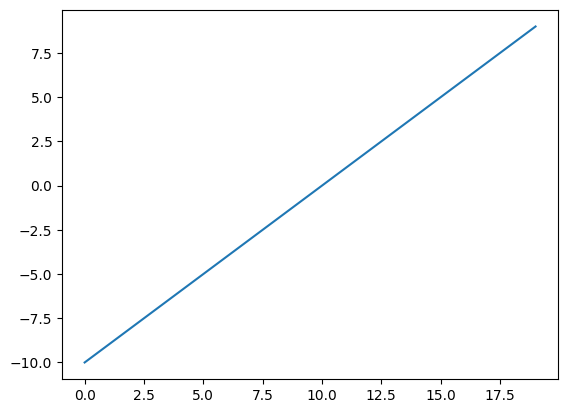

In [9]:
plt.plot(X) # a straight line aka a linear function

In [11]:
# Let's see how the ReLU activation function influences it.

def ReLU(x): # we are writing this ourselves although its available in PyTorch
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
ReLU(X)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

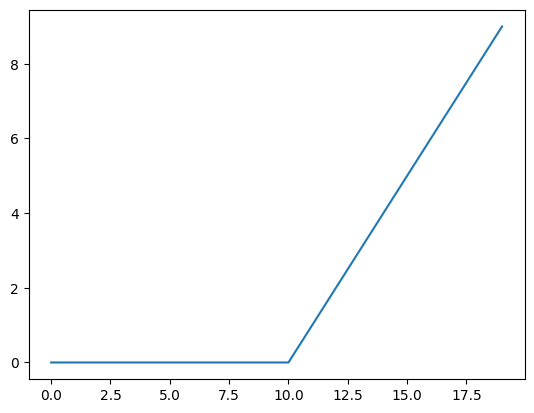

In [12]:
plt.plot(ReLU(X))

In [14]:
# How about Sigmoid function

# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid
sigmoid(X)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

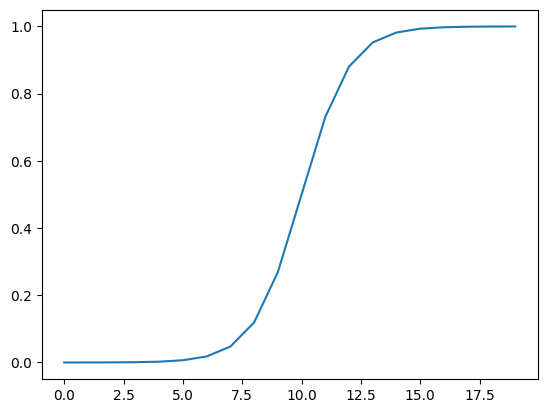

In [15]:
plt.plot(sigmoid(X))

In [16]:
# These are the two most common ones, but there's plenty more non-linear activation functions
# that exist in PyTorch that we haven't tried.
# Fine them here: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

In [17]:
# What does our model do when we combine both linear and non-linear functions?
# Instead of telling our model what to do, we give it tools to figure out how to best discover patterns
# in the data.

# And those tools are linear and non-linear functions.

In [18]:
# Multi-class classification can deal with any number of classes over two, for example,
# the popular ImageNet-1k dataset is used as a computer vision benchmark and has 1000 classes.
# https://www.image-net.org/download.php (1000 objects, 1,281,167 training images, 50,000 validation images , 100,000 test images)

In [19]:
# let's do the following:

# Create some multi-class data with make_blobs().
# Turn the data into tensors (the default of make_blobs() is to use NumPy arrays).
# Split the data into training and test sets using train_test_split().
# Visualize the data.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


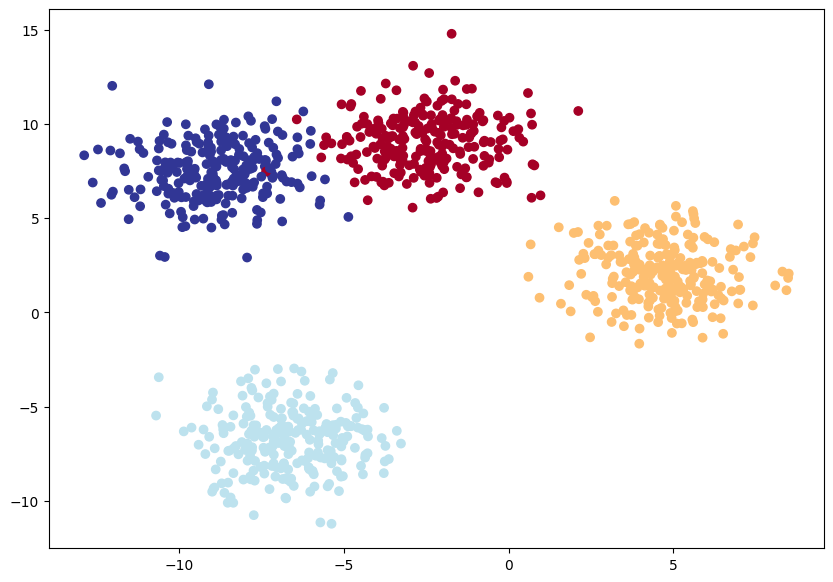

In [23]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [27]:
# Building a multi-class classification model in PyTorch

# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_1 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_1

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [28]:
model_1.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.2511,  0.0119],
                      [-0.1153, -0.1927],
                      [-0.5414,  0.2978],
                      [ 0.1971, -0.0137],
                      [-0.4706,  0.2807],
                      [-0.4475, -0.6469],
                      [-0.5625,  0.4453],
                      [-0.6145, -0.3335]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([-0.6560, -0.4489,  0.1843, -0.0790,  0.2866,  0.6394,  0.4891,  0.3134],
                     device='cuda:0')),
             ('linear_layer_stack.1.weight',
              tensor([[ 0.3482,  0.2210,  0.0063, -0.0116,  0.1922, -0.2157, -0.0803,  0.3115],
                      [-0.0889, -0.1864,  0.0951,  0.3475, -0.3269, -0.1047, -0.0976, -0.0963],
                      [ 0.2085,  0.2643, -0.2354, -0.2585,  0.0056,  0.2491, -0.0244,  0.0170],
                      [ 0.0648,  0.2594,  0.1315, -0.2229,  0.3306,  0.3039,  0.2108, -0

In [29]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [30]:
# Alright, we've got a loss function and optimizer ready,
# and we're ready to train our model but before we do
# let's do a single forward pass with our model to see if it works.

model_1(X_blob_train.to(device))[:5]

tensor([[ 0.2309, -0.0146, -0.2984, -0.1469],
        [ 0.3248,  0.4640,  0.0233,  0.7119],
        [ 0.3853,  1.0981, -0.8227,  1.7394],
        [ 0.3581,  0.8667, -0.6171,  1.3555],
        [ 0.3321,  0.5415, -0.0819,  0.8373]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [31]:
# Wonderful, our model is predicting one value for each class that we have.
# Right now our model is outputing logits but what if we wanted to figure out
# exactly which label is was giving the sample?

# That's where the softmax activation function comes into play.
# https://en.wikipedia.org/wiki/Softmax_function

# Make prediction logits with model
y_logits = model_1(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 2.3591e-01, -1.3446e-03, -2.4164e-01, -1.1893e-01],
        [ 3.8711e-01,  8.7917e-01, -7.9173e-02,  1.4237e+00],
        [ 3.5936e-01,  9.2383e-01, -7.7622e-01,  1.4409e+00],
        [ 2.4590e-01,  1.0688e-01, -3.9280e-01,  5.5854e-02],
        [ 2.9572e-01,  2.7866e-01,  4.3403e-02,  3.9185e-01]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.3215, 0.2536, 0.1994, 0.2255],
        [0.1644, 0.2689, 0.1031, 0.4636],
        [0.1659, 0.2917, 0.0533, 0.4892],
        [0.3101, 0.2698, 0.1637, 0.2564],
        [0.2590, 0.2546, 0.2012, 0.2851]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [32]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0]) # just checking one index

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [33]:
# These prediction probablities are essentially saying how much the model thinks
# the target X sample (the input) maps to each class.

# Since there's one value for each class in y_pred_probs,
# the index of the highest value is the class the model thinks the specific
# data sample most belongs to.

# To check which index has the highest value using torch.argmax().

# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))


tensor([0.3215, 0.2536, 0.1994, 0.2255], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')


In [34]:
# Ofcourse, right now this is just random guessing so it's got a 25% chance
# of being right (since there's four classes).
# But we can improve those chances by training the model.

In [35]:
# Redefining (same as last lab)
def accuracy_func(y_true, y_pred): # any evaluation func will compare predictions to ground truth labels
  correct = torch.eq(y_true, y_pred).sum().item() # .item() gets single value, try to test returning .sum()
  acc = (correct/len(y_pred)) * 100
  return acc

# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_func(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_func(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.61368, Acc: 24.50% | Test Loss: 0.92952, Test Acc: 54.50%
Epoch: 10 | Loss: 0.18285, Acc: 99.00% | Test Loss: 0.16245, Test Acc: 99.50%
Epoch: 20 | Loss: 0.09333, Acc: 99.12% | Test Loss: 0.08452, Test Acc: 99.50%
Epoch: 30 | Loss: 0.06611, Acc: 99.00% | Test Loss: 0.05821, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05359, Acc: 99.00% | Test Loss: 0.04568, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04655, Acc: 99.00% | Test Loss: 0.03849, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04210, Acc: 99.00% | Test Loss: 0.03385, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03905, Acc: 99.00% | Test Loss: 0.03063, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03685, Acc: 99.00% | Test Loss: 0.02826, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03520, Acc: 99.00% | Test Loss: 0.02646, Test Acc: 99.50%


In [36]:
# Making and evaluating predictions with a PyTorch multi-class model

# It looks like our trained model is performaning pretty well.
# To make sure of this, let's make some predictions and visualize them.

# Make predictions
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_blob_test)

# View the first 10 predictions
y_logits[:10]


tensor([[  8.3697,  13.7866,  -9.9348,  -4.7579],
        [  2.3595, -12.8698,   0.6620,   8.0439],
        [-12.9608, -18.5667,  15.1451,   6.8290],
        [  3.9877,   9.4559,  -5.2486,  -3.6367],
        [ 11.4271,   6.7478, -11.1798,  -0.0702],
        [  2.2552, -16.1525,   1.4134,   9.7994],
        [-12.5224, -14.9253,  14.0306,   4.9725],
        [  8.7651,   1.4899,  -7.8042,   2.0393],
        [-14.5991, -24.8849,  17.8429,   9.8032],
        [  9.5610,   3.3619,  -8.8739,   1.2455]], device='cuda:0')

In [37]:
# Alright, looks like our model's predictions are still in logit form.
# Though to evaluate them, they'll have to be in the same form
# as our labels (y_blob_test) which are in integer form.

# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_func(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


In [39]:
# Our model predictions are now in the same form as our test labels.
# Let's visualize them with plot_decision_boundary(),
# remember because our data is on the GPU, we'll have to move it to the CPU for
# use with matplotlib (plot_decision_boundary() does this automatically for us).


# Creating a helper function to create decision boundaries
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Plots decision boundaries of model predicting on X in comparison to y.
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

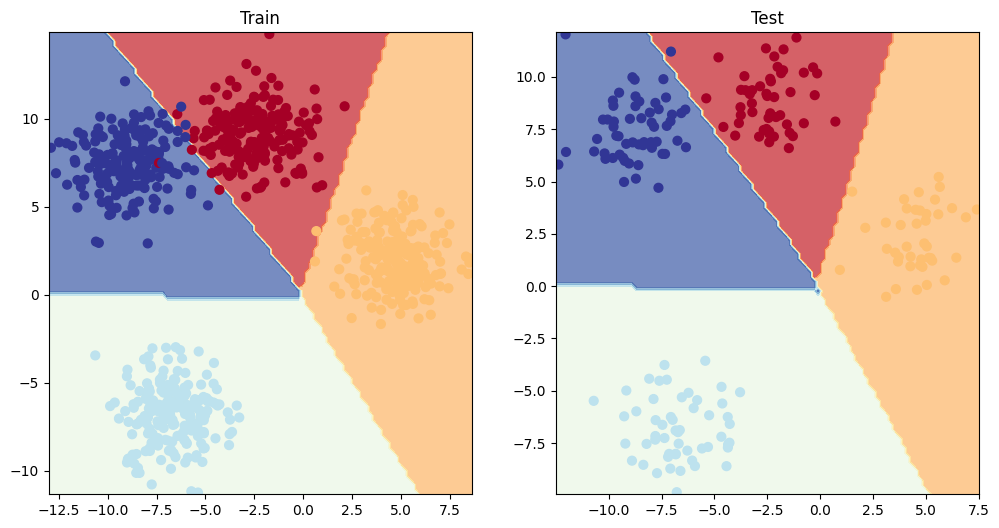

In [41]:
# Visalize!
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_blob_test, y_blob_test)